In [1]:
import pandas as pd
import torch
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from latentmi import lmi
import os
import numpy as np

In [3]:
# load held-out labels and images
val_data = pd.read_csv("../embeddings/MNIST/held_out.csv")
val_labels = val_data["label"].values

# function to compute accuracy of a linear probe!
def compute_linear_probe_accuracy(epoch):
    # load embeddings for the given epoch
    embeddings_file = f"../embeddings/MNIST/AE_epoch{epoch}.csv"
    embeddings = pd.read_csv(embeddings_file, header=None).values

    # split into train and test
    X_train, X_test, y_train, y_test = train_test_split(embeddings[:, 1:], embeddings[:, 0], test_size=0.2, random_state=42)

    # train logistic regression
    clf = LogisticRegression(max_iter=1000, solver='lbfgs', multi_class='multinomial')
    clf.fit(X_train, y_train)

    # evaluate on test set
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"Accuracy of linear probe for epoch {epoch}: {acc:.4f}")
    return acc

def MI_probe(epoch):
    embeddings_file = f"../embeddings/MNIST/AE_epoch{epoch}.csv"
    embeddings = pd.read_csv(embeddings_file, header=None).values
    X, y = embeddings[:, 1:], embeddings[:, 0]
    y_onehot = np.random.normal(size=(len(y), 10))*0.1
    y_onehot[np.arange(len(y), dtype=int), y.astype(int)] = 1
    return np.nanmean(lmi.estimate(X, y_onehot)[0])


MIs = []
linears = []

for epoch in range(1, 51):  # assuming up to 50 epochs
    embeddings_file = f"../embeddings/MNIST/AE_epoch{epoch}.csv"
    if not os.path.exists(embeddings_file):
        print(f"No embeddings found for epoch {epoch}. Stopping.")
        break
    linears.append(compute_linear_probe_accuracy(epoch))
    MIs.append(MI_probe(epoch))


/home/gokul/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy of linear probe for epoch 1: 0.5342
epoch 211 (of max 300) 🌻🌻🌻🌻🌻🌻🌻

/home/gokul/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy of linear probe for epoch 2: 0.6018
epoch 299 (of max 300) 🌻🌻🌻🌻🌻🌻🌻🌻🌻

/home/gokul/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy of linear probe for epoch 3: 0.6370
epoch 299 (of max 300) 🌻🌻🌻🌻🌻🌻🌻🌻🌻

/home/gokul/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy of linear probe for epoch 4: 0.6597
epoch 299 (of max 300) 🌻🌻🌻🌻🌻🌻🌻🌻🌻

/home/gokul/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy of linear probe for epoch 5: 0.7088
epoch 299 (of max 300) 🌻🌻🌻🌻🌻🌻🌻🌻🌻

/home/gokul/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy of linear probe for epoch 6: 0.7338
epoch 299 (of max 300) 🌻🌻🌻🌻🌻🌻🌻🌻🌻

/home/gokul/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy of linear probe for epoch 7: 0.7445
epoch 299 (of max 300) 🌻🌻🌻🌻🌻🌻🌻🌻🌻

/home/gokul/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy of linear probe for epoch 8: 0.7518
epoch 299 (of max 300) 🌻🌻🌻🌻🌻🌻🌻🌻🌻

/home/gokul/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy of linear probe for epoch 9: 0.7560
epoch 299 (of max 300) 🌻🌻🌻🌻🌻🌻🌻🌻🌻

/home/gokul/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy of linear probe for epoch 10: 0.7633
epoch 299 (of max 300) 🌻🌻🌻🌻🌻🌻🌻🌻🌻

/home/gokul/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy of linear probe for epoch 11: 0.7665
epoch 299 (of max 300) 🌻🌻🌻🌻🌻🌻🌻🌻🌻

/home/gokul/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy of linear probe for epoch 12: 0.7735
epoch 299 (of max 300) 🌻🌻🌻🌻🌻🌻🌻🌻🌻

/home/gokul/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy of linear probe for epoch 13: 0.7780
epoch 299 (of max 300) 🌻🌻🌻🌻🌻🌻🌻🌻🌻

/home/gokul/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy of linear probe for epoch 14: 0.7830
epoch 299 (of max 300) 🌻🌻🌻🌻🌻🌻🌻🌻🌻

/home/gokul/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy of linear probe for epoch 15: 0.7860
epoch 299 (of max 300) 🌻🌻🌻🌻🌻🌻🌻🌻🌻

/home/gokul/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy of linear probe for epoch 16: 0.7925
epoch 299 (of max 300) 🌻🌻🌻🌻🌻🌻🌻🌻🌻

/home/gokul/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy of linear probe for epoch 17: 0.7967
epoch 299 (of max 300) 🌻🌻🌻🌻🌻🌻🌻🌻🌻Accuracy of linear probe for epoch 18: 0.8028
epoch 299 (of max 300) 🌻🌻🌻🌻🌻🌻🌻🌻🌻Accuracy of linear probe for epoch 19: 0.8063
epoch 299 (of max 300) 🌻🌻🌻🌻🌻🌻🌻🌻🌻Accuracy of linear probe for epoch 20: 0.8100
epoch 299 (of max 300) 🌻🌻🌻🌻🌻🌻🌻🌻🌻Accuracy of linear probe for epoch 21: 0.8127
epoch 299 (of max 300) 🌻🌻🌻🌻🌻🌻🌻🌻🌻Accuracy of linear probe for epoch 22: 0.8158
epoch 299 (of max 300) 🌻🌻🌻🌻🌻🌻🌻🌻🌻No embeddings found for epoch 23. Stopping.


In [4]:
d = {"epoch": range(1, len(MIs)+1), "MI": MIs, "linear": linears}
df = pd.DataFrame(d)
df

,epoch,MI,linear
0,1,1.467651,0.534167
1,2,1.781702,0.601833
2,3,2.070709,0.637000
3,4,2.316656,0.659667
4,5,2.525805,0.708833
5,6,2.622597,0.733833
6,7,2.682721,0.744500
7,8,2.703327,0.751833
8,9,2.751630,0.756000
9,10,2.762958,0.763333


In [ ]:
df.to_csv("..results/MI_vs_linear_probe.csv", index=False)

<Axes: xlabel='linear', ylabel='MI'>

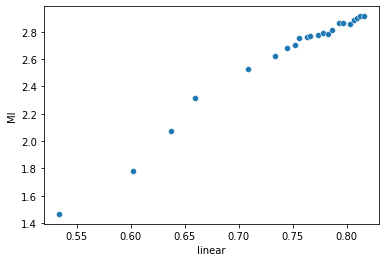

In [7]:
import seaborn as sns

sns.scatterplot(data=df, x="linear", y="MI")